# Chapter 5: Learning multiple weights at a time

## Multiple Inputs

* We've seen gradient descent with a single input and single output.
* Most Neural Networks have multiple inputs and/or outputs.
* Luckily, we can train multiple weights at once using vectors.

Let's start with our typical gradient descent and extend it to multiple inputs first.

Below is our single input/output code. Let's code up a multiple input version below that.

In [6]:
weight = 0
goal_pred = 0.8
input = 2
alpha = 0.1         #step size

for iteration in range(50):
    pred = input * weight          # Make a prediction using the neural network
    error = (pred - goal_pred)**2  # Calculate the error for a metric of how well we're doing. MSE in this case
    delta = pred - goal_pred       # Calculate delta, which is the pure error
    weight_delta = delta * input   # Calculate the derivative by multiplying by the input
    weight = weight - (weight_delta * alpha) # Modify the weight by subtracting the derivative multiplied by alpha
    print("error:" + str(error) + " Prediction:" + str(pred))
    print("Delta:" + str(delta) + " Weight_delta:" + str(weight_delta))

error:0.6400000000000001 Prediction:0
Delta:-0.8 Weight_delta:-1.6
error:0.2304 Prediction:0.32000000000000006
Delta:-0.48 Weight_delta:-0.96
error:0.08294400000000002 Prediction:0.512
Delta:-0.28800000000000003 Weight_delta:-0.5760000000000001
error:0.029859840000000023 Prediction:0.6272
Delta:-0.17280000000000006 Weight_delta:-0.34560000000000013
error:0.0107495424 Prediction:0.69632
Delta:-0.10368 Weight_delta:-0.20736
error:0.0038698352640000053 Prediction:0.737792
Delta:-0.06220800000000004 Weight_delta:-0.12441600000000008
error:0.0013931406950400036 Prediction:0.7626752
Delta:-0.03732480000000005 Weight_delta:-0.0746496000000001
error:0.0005015306502144003 Prediction:0.77760512
Delta:-0.022394880000000006 Weight_delta:-0.04478976000000001
error:0.0001805510340771829 Prediction:0.7865630720000001
Delta:-0.013436927999999959 Weight_delta:-0.026873855999999918
error:6.499837226778621e-05 Prediction:0.7919378432
Delta:-0.008062156799999998 Weight_delta:-0.016124313599999995
error:2.

In [10]:
# Let's code up a multiple input version below.

import numpy as np
import sys
weights = np.zeros(3)
win_or_lose = 1.0
num_toes = 0.5
wlrec = 0.65
nfans = 1.2
alpha = 0.1

threshold = 1e-4

def neural_network(inputs, weights):
    pred = np.dot(inputs, weights)
    return pred

old_mse = sys.float_info.max
mse = 0

inputs = np.array([num_toes, wlrec, nfans])

iterations = 0

while(abs(old_mse - mse) > threshold):
    old_mse = mse
    pred = neural_network(inputs, weights)
    mse = (pred - win_or_lose)**2
    delta = pred - win_or_lose                  #True error
    weight_deltas = delta * inputs              #Set weight change
    weights = weights -  (weight_deltas * alpha) #Update weights
    iterations += 1
    print(f"Prediction: {pred}, MSE: {mse}, Iterations: {iterations}")
    print(f"Weights: {weights}\n")

Prediction: 0.0, MSE: 1.0, Iterations: 1
Weights: [0.05  0.065 0.12 ]

Prediction: 0.21125, MSE: 0.6221265625000001, Iterations: 2
Weights: [0.0894375  0.11626875 0.21465   ]

Prediction: 0.3778734375, MSE: 0.38704145976806636, Iterations: 3
Weights: [0.12054383 0.15670698 0.28930519]

Prediction: 0.509297673828125, MSE: 0.24078877291048922, Iterations: 4
Weights: [0.14507894 0.18860263 0.34818947]

Prediction: 0.6129585402319336, MSE: 0.14980109157939572, Iterations: 5
Weights: [0.16443102 0.21376032 0.39463444]

Prediction: 0.6947210486079376, MSE: 0.0931952381630372, Iterations: 6
Weights: [0.17969496 0.23360345 0.43126792]

Prediction: 0.7592112270895107, MSE: 0.05797923315973918, Iterations: 7
Weights: [0.1917344  0.24925472 0.46016257]

Prediction: 0.8100778553668516, MSE: 0.03607042102205453, Iterations: 8
Weights: [0.20123051 0.26159966 0.48295323]

Prediction: 0.8501989084206042, MSE: 0.02244036703837853, Iterations: 9
Weights: [0.20872057 0.27133674 0.50092936]

Prediction: 0

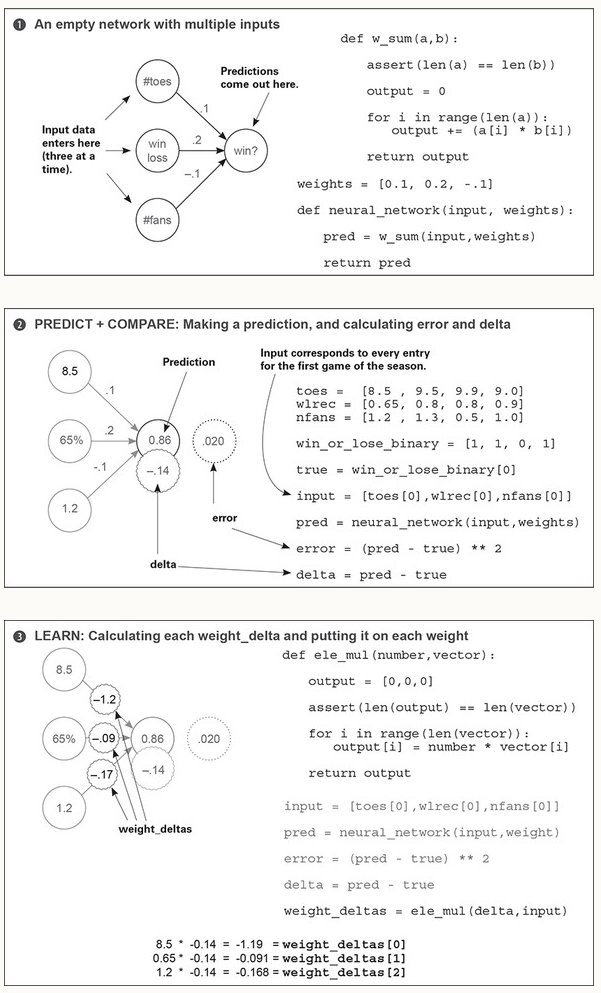
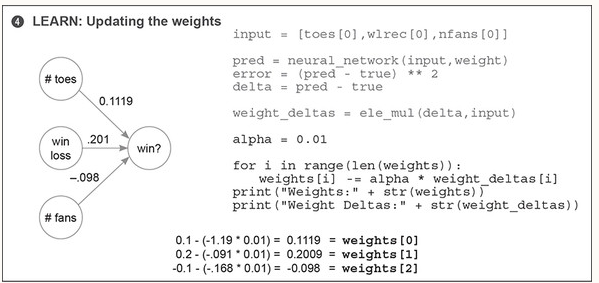

# Freezing a single weight

To better illustrate how the weights affect each other, let's train our neural network, but we'll freeze one of them in place.

We know that we update weights by subtracting their corresponding weight_deltas form each one of them. To "freeze" one, we can just make weight_delta = 0 to zero for one of them.

In [12]:
# Copy the code from above, but now make sure we set weight_deltas[0] = 0 to freeze it

# Let's code up a multiple input version below.

import numpy as np
import sys
weights = np.zeros(3)
win_or_lose = 1.0
num_toes = 0.5
wlrec = 0.65
nfans = 1.2
alpha = 0.1

threshold = 1e-4

def neural_network(inputs, weights):
    pred = np.dot(inputs, weights)
    return pred

old_mse = sys.float_info.max
mse = 0

inputs = np.array([num_toes, wlrec, nfans])

iterations = 0

while(abs(old_mse - mse) > threshold):
    old_mse = mse
    pred = neural_network(inputs, weights)
    mse = (pred - win_or_lose)**2
    delta = pred - win_or_lose                  #True error
    weight_deltas = delta * inputs             #Set weight change
    weight_deltas[0] = 0
    weights = weights - (weight_deltas * alpha) #Update weights
    iterations += 1
    print(f"Prediction: {pred}, MSE: {mse}, Iterations: {iterations}")
    print(f"Weights: {weights}\n")

Prediction: 0.0, MSE: 1.0, Iterations: 1
Weights: [0.    0.065 0.12 ]

Prediction: 0.18625, MSE: 0.6621890625, Iterations: 2
Weights: [0.         0.11789375 0.21765   ]

Prediction: 0.3378109375, MSE: 0.43849435449462887, Iterations: 3
Weights: [0.         0.16093604 0.29711269]

Prediction: 0.461143650390625, MSE: 0.29036616551434097, Iterations: 4
Weights: [0.         0.1959617  0.36177545]

Prediction: 0.5615056455053711, MSE: 0.1922772989236613, Iterations: 5
Weights: [0.         0.22446383 0.41439477]

Prediction: 0.6431752190299957, MSE: 0.12732392431429151, Iterations: 6
Weights: [0.         0.24765745 0.45721375]

Prediction: 0.709633834485659, MSE: 0.08431251007550168, Iterations: 7
Weights: [0.         0.26653125 0.49205769]

Prediction: 0.763714532812705, MSE: 0.05583082200391828, Iterations: 8
Weights: [0.         0.2818898  0.52041194]

Prediction: 0.8077227010763387, MSE: 0.036970559681379, Iterations: 9
Weights: [0.         0.29438783 0.54348522]

Prediction: 0.843534348

## Some theoretical notes about weights affecting another.

We see that the MSE is able to get sufficiently small, but the weights are considerably different.

The two other weights learned to find both the desired output, but also "train" the MSE to shrink without modifying the other.

* This has positive and negative implications.
  * It means that our neural network can still get descent output with limited information.
  * It also means that if we have a good predicting variable, the neural network may train to learn without using it, which may lead to poor performance when deployed.

As far as gradient descent goes, this also implies that as soon as one variable reaches the "bottom of the error bowl", then all variables do.

This is because the error is shared between all weights. Each may have their own specific curve, but if one reaches the bottom, then they all do.

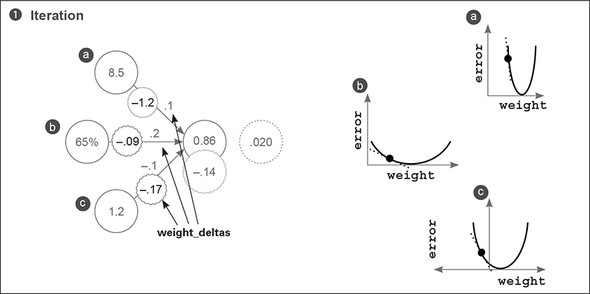
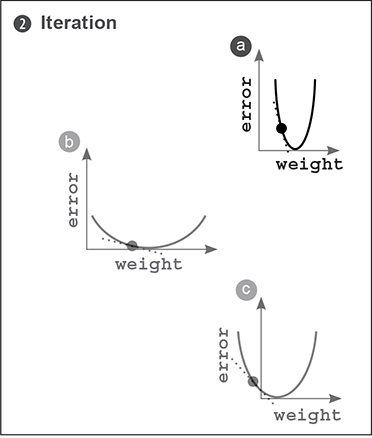
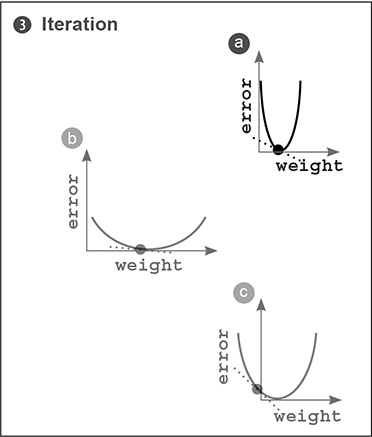

An interesting thing is that these pictures for each weight represent a slide of a single 4D bowl that reprents the the error plane.

# Gradient Descent with Multiple Outputs

Let's continue on by modifying our training to handle multiple outputs. For now, we'll start with a single input, then continue on to multiple inputs and outputs later.

In [1]:
import numpy as np

# Code up single input with multiple outputs
wlrec = 0.65
hurt = 0.2
win_or_lose = 1.0
fan_sat = 0.8
weights = np.array([0.3,0.2,0.9])
threshold = .001
alpha = 0.1

input = wlrec
goal_preds = np.array([hurt, win_or_lose, fan_sat])


def neural_network(input, weights):
    preds = input * weights
    return preds

old_mse = np.repeat(1000.0, 3)        #arbitrary large MSE
mse = np.zeros(3)
iterations = 0

while(abs(sum(mse) - sum(old_mse)) > threshold):
    preds = neural_network(input, weights)
    old_mse = mse.copy()
    mse = (preds - goal_preds)**2
    deltas = preds - goal_preds
    weight_deltas = deltas * input
    weights = weights - (weight_deltas * alpha)
    iterations += 1

    print(f"Preds: {preds}, MSE: {sum(mse)}, Iterations: {iterations}")
    print(f"Weights: {weights}\n")
print(sum(mse))

Preds: [0.195 0.13  0.585], MSE: 0.80315, Iterations: 1
Weights: [0.300325 0.25655  0.913975]

Preds: [0.19521125 0.1667575  0.59408375], MSE: 0.7367174979468749, Iterations: 2
Weights: [0.30063627 0.31071076 0.92735956]

Preds: [0.19541357 0.201962   0.60278371], MSE: 0.6757799561490427, Iterations: 3
Weights: [0.30093439 0.36258323 0.94017861]

Preds: [0.19560735 0.2356791  0.6111161 ], MSE: 0.6198828593124222, Iterations: 4
Weights: [0.30121991 0.41226409 0.95245607]

Preds: [0.19579294 0.26797166 0.61909644], MSE: 0.5686092873470737, Iterations: 5
Weights: [0.30149337 0.45984593 0.9642148 ]

Preds: [0.19597069 0.29889986 0.62673962], MSE: 0.521576805682241, Iterations: 6
Weights: [0.30175527 0.50541744 0.97547672]

Preds: [0.19614093 0.32852134 0.63405987], MSE: 0.4784346127987848, Iterations: 7
Weights: [0.30200611 0.54906356 0.98626283]

Preds: [0.19630397 0.35689131 0.64107084], MSE: 0.43886092370329666, Iterations: 8
Weights: [0.30224635 0.59086562 0.99659323]

Preds: [0.196460

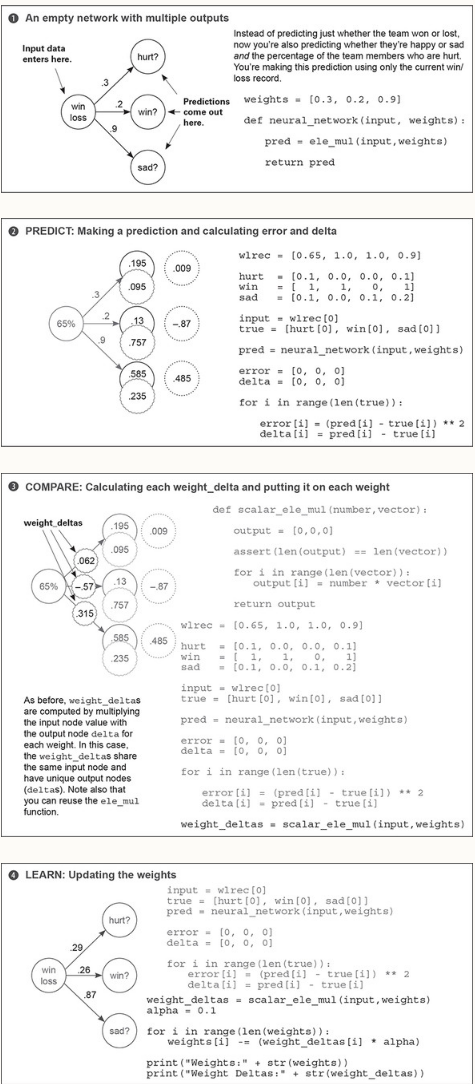

Notice now that since we have multple outputs, we'll have multiple error values.

We can either consolidate all the errors to give us a grand error, or we can evaluate each error individually as we did in our code above.

# Gradient Descent with multiple inputs and multiple outputs

Now let's put have multiple inputs and multiple outputs. A common architecture we'll see throughout the course.

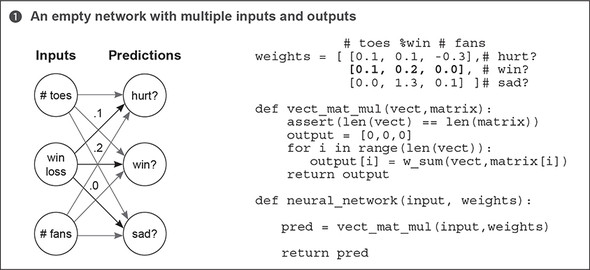

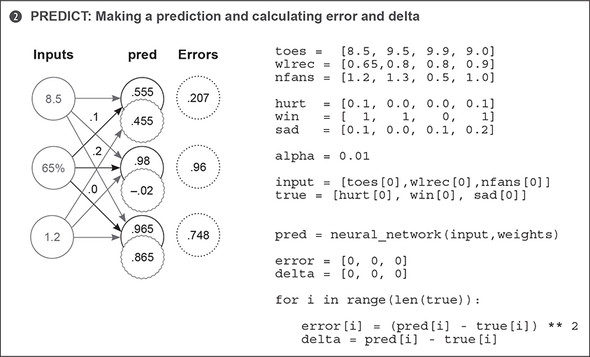

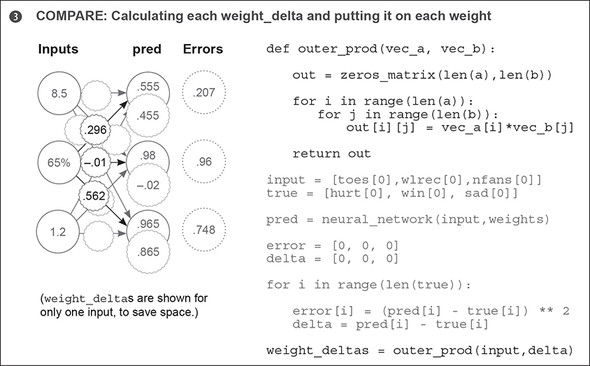

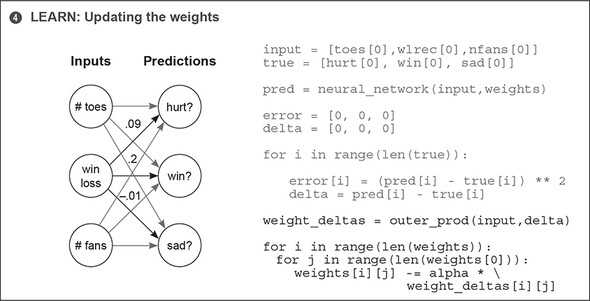

Notice that we can treat each weight in a similar similar as we've seen, but we just have to iterate through all possible combinations. Doing by hand is incredibly tedious, which is a good reason why neural networks haven't taken off as a viable model until recent decades.

In [1]:
# Let's code up a fully commected multi-input/output perceptron.

'''Functions First'''
import numpy as np

def neural_network(inputs, weights):
    outputs = np.zeros(3)
    for i in range(len(outputs)):
        outputs[i] = np.dot(inputs, weights[i])
    return outputs

def get_wdeltas(inputs, deltas):
    w_deltas = np.zeros((len(inputs), len(deltas)))
    for i in range(len(inputs)):
        for j in range(len(deltas)):
            w_deltas[i][j] = deltas[j] * inputs[i]
    return w_deltas

def update_weights(weights, w_deltas, alpha):
    for i in range(len(weights[0])):
        for j in range(len(w_deltas[0])):
            weights[i][j] -= w_deltas[j][i] * alpha
    return weights
    
          # num_T wlrec nfans
weights =   [[0.1, 0.1, -0.3], # First Weighted sum
             [0.1, 0.2, 0.0], # Second weighted sum
             [0.0, 1.3, 0.1]  # Third weighted sum
            ]

hurt = 0.1
win_or_lose = 1
sad = 0.1
goal_preds = np.array([hurt, win_or_lose, sad])  # hurt %, worlose, sad%

num_toes = 8.2
wlrec = 0.65
nfans = 1.2

inputs = np.array([num_toes, wlrec, nfans])

preds = np.zeros(3)
deltas = np.zeros(3)
alpha = 0.01
mse = np.repeat(1000.0, 3) # arbitrary large value
old_mse = np.zeros(3)
threshold = 1e-5

'''Now the training loop'''

while(abs(sum(old_mse) - sum(mse)) > threshold):
    preds = neural_network(inputs, weights)
    old_mse = mse.copy()
    for i in range(len(preds)):
        mse[i] = (preds[i] - goal_preds[i])**2
        deltas[i] = preds[i] - goal_preds[i]
    weight_deltas = get_wdeltas(inputs, deltas)
    weights = update_weights(weights, weight_deltas, alpha)

print(f"MSE: {mse}")
print(f"Preds: {preds}")
weights


MSE: [1.36728154e-07 1.89243120e-09 5.66385734e-07]
Preds: [0.10036977 0.9999565  0.10075259]


[[np.float64(0.049581228488167615),
  np.float64(0.09600339006308646),
  np.float64(-0.3073783568066097)],
 [np.float64(0.10593162017786265),
  np.float64(0.20047018940434277),
  np.float64(0.0008680419772481899)],
 [np.float64(-0.1026170290770236),
  np.float64(1.29186572330487),
  np.float64(0.0849828737936063)]]

Let's use a real world example, the MNIST Digit Dataset

(1797, 64)


<Figure size 640x480 with 0 Axes>

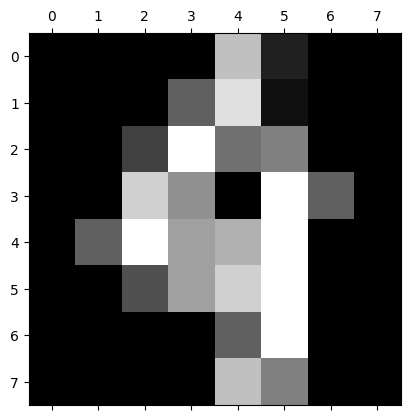

4


In [1]:
# Let's load up the dataset and take a look
# If working on a local system, you'll need to install sklearn
# pip install scikit-learn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.data.shape)
plt.gray()
index = 24 # Happens to be the number four (4)
plt.matshow(digits.images[index])
plt.show()
print(digits.target[index])

In [2]:
# Show how an image is represented by numeric data
digits.images[index]

array([[ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  7.,  8.,  0.,  0.],
       [ 0.,  0., 13.,  9.,  0., 16.,  6.,  0.],
       [ 0.,  6., 16., 10., 11., 16.,  0.,  0.],
       [ 0.,  0.,  5., 10., 13., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.]])

In [3]:
# Write code to train the neural net for a particular image
import numpy as np
import sys
weights = np.zeros(64)
alpha = 0.0001

threshold = 1e-4

def neural_network(inputs, weights):
    pred = np.dot(inputs, weights)
    return pred

old_mse = 1000.0
mse = 0.0

index = 24
inputs = digits.data[index] #64 ixels that make up the digit 4 image
goal_pred = digits.target[index]

count = 0

while(abs(mse - old_mse) > threshold):
    old_mse = mse
    count += 1
    pred = neural_network(inputs, weights)
    mse = (pred - goal_pred)**2
    delta = pred - goal_pred
    weight_deltas = delta * inputs
    weights -= weight_deltas * alpha

    print(f'Prediction: {pred}, MSE: {mse}, Count: {count}')
    print(f'Weights: {weights}\n')

Prediction: 0.0, MSE: 16.0, Count: 1
Weights: [0.     0.     0.     0.     0.0048 0.0008 0.     0.     0.     0.
 0.     0.0024 0.0056 0.0004 0.     0.     0.     0.     0.0016 0.0064
 0.0028 0.0032 0.     0.     0.     0.     0.0052 0.0036 0.     0.0064
 0.0024 0.     0.     0.0024 0.0064 0.004  0.0044 0.0064 0.     0.
 0.     0.     0.002  0.004  0.0052 0.0064 0.     0.     0.     0.
 0.     0.     0.0024 0.0064 0.     0.     0.     0.     0.     0.
 0.0048 0.0032 0.     0.    ]

Prediction: 1.2508, MSE: 7.55810064, Count: 2
Weights: [0.         0.         0.         0.         0.00809904 0.00134984
 0.         0.         0.         0.         0.         0.00404952
 0.00944888 0.00067492 0.         0.         0.         0.
 0.00269968 0.01079872 0.00472444 0.00539936 0.         0.
 0.         0.         0.00877396 0.00607428 0.         0.01079872
 0.00404952 0.         0.         0.00404952 0.01079872 0.0067492
 0.00742412 0.01079872 0.         0.         0.         0.
 0.0033746  0.

In [5]:
import numpy as np
import sys
# Let's code up a fully commected multi-input/output perceptron.

# For Weight Matrices, Each row repersents the weights going to an output node.
# So, the number of rows is the number of output nodes.
# The columns is the number of inputs. So, the weights down the column represent
# the weights from a single input going to the different outputs.
# With 10 output nodes and 64 input pixels, then the weight matrix is 10x64

def neural_network(inputs, weights):
    n_outputs = weights.shape[0]
    outputs = np.zeros(n_outputs)
    for i in range(n_outputs):
        outputs[i] = np.dot(inputs, weights[i])
    return outputs

def get_wdeltas(inputs, deltas):
    nRows = len(deltas)
    nCols = len(inputs)
    w_deltas = np.zeros((nRows, nCols))
    for i in range(nRows):
        for j in range(nCols):
            w_deltas[i][j] = deltas[i] * inputs[j]
    return w_deltas

def update_weights(weights, w_deltas, alpha):
    nRows, nCols = weights.shape
    for i in range(nRows):
        for j in range(nCols):
            weights[i][j] -= w_deltas[j][i] * alpha
    return weights


'''functions first'''

import numpy as np
import sys
weights = np.zeros((10,64))
alpha = 0.0001

threshold = 1e-4

index = 24
inputs = digits.data[index]
goal_preds = np.zeros(10)
goal_preds[digits.target[index]] = 1
deltas = np.zeros(10)
old_mse = np.repeat(sys.float_info.max, 10)
mse = np.zeros(10)
count = 0

'''Training Loop'''

while(abs(sum(mse) - sum(old_mse)) > threshold):
    count += 1
    old_mse = mse.copy()
    preds = neural_network(inputs, weights)

    for i in range(len(deltas)):
        mse[i] = (preds[i] - goal_preds[i])**2
        deltas[i] = preds[i] - goal_preds[i]
    weight_deltas = get_wdeltas(inputs, deltas)
    weights = update_weights(weights, weight_deltas, alpha)

    print(f'Predictions: {preds}, MSE: {sum(mse)}')


C:\Users\DSU\AppData\Local\Temp\ipykernel_17000\1669430005.py:55: RuntimeWarning: overflow encountered in scalar add
  while(abs(sum(mse) - sum(old_mse)) > threshold):


IndexError: index 10 is out of bounds for axis 0 with size 10